# Boundary Value Problems for PDEs

## Laplace Equation

In a region devoid of charges, the electrostatic potential $\phi(\vec{r})$ satisfies the Laplace equation
\begin{equation}
\nabla^2\phi(\vec{r}) = 0.
\end{equation}

To solve the Laplace equation over a rectangular region $0 \leq x \leq L_x$ and $0 \leq y \leq L_y$, we need to discretize the rectangular region so that there are $N_x$ points along the $x$ direction, and $N_y$ points along the $y$ direction, as shown in the figure below.

<img src="http://www1.spms.ntu.edu.sg/~cheongsa/laplacedomain.png" width=400>

Because $\phi(\vec{r})$ is not a function of time $t$, we do not need to impose initial conditions to solve the Laplace equation. Instead, we need to solve for $\phi(\vec{r})$ subject to the boundary conditions
\begin{equation}
\begin{aligned}
\phi(x = 0, y) &= f(y), \\
\phi(x = L_x, y) &= g(y), \\
\phi(x, y = 0) &= h(x), \\
\phi(x, y = L_y) &= j(x),
\end{aligned}
\end{equation}
where $f(y)$, $g(y)$, $h(x)$, $j(x)$ are arbitrary functions of $x$ and $y$. For example, suppose $f(y) = 0$, $g(y) = 0$, $h(x) = \sin\dfrac{\pi x}{L_x}$, and $j(x) = 0$. We then set $\phi(i, j)$ on the white circles to these values accordingly.

To solve for $\phi(i, j)$ on the black circles, we need to make use of the approximation
\begin{equation}
\nabla^2\phi(x_i, y_j) \approx \dfrac{\phi(i+1, j) - 2\phi(i, j) + \phi(i-1, j)}{\Delta x^2} + \dfrac{\phi(i, j+1) - 2\phi(i, j) + \phi(i, j-1)}{\Delta y^2},
\end{equation}
and the boundary conditions $\phi(i, j)$ on the white circles.

### Relaxation Method

One of the simplest way to solve for $\phi(i, j)$ on the black circles is to do so iteratively. Suppose $\phi(i, j, t)$ is the $t$th iterate of the electrostatic potential $\phi(x_i, y_j)$, define the $(t+1)$th iterate as
\begin{equation}
\left(\dfrac{2}{\Delta x^2} + \dfrac{2}{\Delta y^2}\right)\phi(i, j, t+1) = \dfrac{\phi(i+1, j, t) + \phi(i-1, j, t)}{\Delta x^2} + \dfrac{\phi(i, j+1, t) + \phi(i, j-1, t)}{\Delta y^2}.
\end{equation}

The solution $\phi(x_i, y_j)$ is then obtained as
\begin{equation}
\phi(x_i, y_j) = \lim_{t \to \infty} \phi(i, j, t).
\end{equation}
Because we get the same solution whatever initial value we set $\phi(i, j, 0)$ to be, this method is called the <em>relaxation method</em>.


In [1]:
# import modules
import numpy as np
import matplotlib.pyplot as plt
# initialize arrays
x = np.linspace(0, 1, 6)
y = np.linspace(0, 1, 6)
dx = x[1] - x[0]
dy = y[1] - y[0]
A = 2.0/(dx*dx) + 2.0/(dy*dy)
B = 1.0/(dx*dx)
C = 1.0/(dy*dy)
phi = np.zeros((6,6))
T = 2
# impose boundary conditions
# only phi(x,y=0) = sin(pi*x) is non-trivial
for i in range(6):
    phi[i,0] = np.sin(np.pi*x[i])
# relaxation method
for t in range(T):
    newphi = np.zeros((6,6))
    for i in range(1,5):
        for j in range(1,5):
            newphi[i,j] = (B*(phi[i+1,j] + phi[i-1,j]) + C*(phi[i,j+1] + phi[i,j-1]))/A
    for i in range(1,5):
        for j in range(1,5):
            phi[i,j] = newphi[i,j]
            

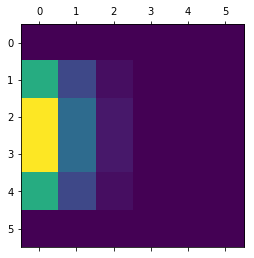

In [2]:
plt.matshow(phi)
plt.show()

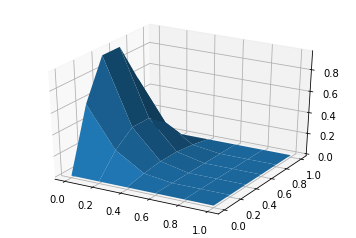

In [3]:
from mpl_toolkits import mplot3d
xx, yy = np.meshgrid(x, y)
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(xx, yy, phi)
plt.show()

### Matrix Solution

Another method to solve for $\phi(x_i, y_j)$ on the black circles would be to write down a matrix equation representing the Laplace equation and the boundary conditions imposed, and solve this directly.

To do so, we have to relabel the black circles from $k = 0$ (corresponding to $(i, j) = (1, 1)$) to $k = N-1$ (corresponding to $(i, j) = (N_x - 2, N_y - 2)$).

Thereafter, for interior points surrounded by black circles (as shown below),

<img src="http://www1.spms.ntu.edu.sg/~cheongsa/interior.png" width=150>

we extract the matrix elements
\begin{align}
M(k_0, k_0) &= -\dfrac{2}{\Delta x^2} - \dfrac{2}{\Delta y^2}, \\
M(k_0, k_1) &= \dfrac{1}{\Delta y^2}, \\
M(k_0, k_2) &= \dfrac{1}{\Delta x^2}, \\
M(k_0, k_3) &= \dfrac{1}{\Delta y^2}, \\
M(k_0, k_4) &= \dfrac{1}{\Delta x^2},
\end{align}
and the element
\begin{equation}
b(k_0) = 0
\end{equation}
in the vector of constants $\vec{b}$.

For edge points surrounded by one white circle, as shown below,

<img src="http://www1.spms.ntu.edu.sg/~cheongsa/edges.png" width=600>

we extract for the first situation, the matrix elements
\begin{align}
M(k_0, k_0) &= -\dfrac{2}{\Delta x^2} - \dfrac{2}{\Delta y^2}, \\
M(k_0, k_2) &= \dfrac{1}{\Delta x^2}, \\
M(k_0, k_3) &= \dfrac{1}{\Delta y^2}, \\
M(k_0, k_4) &= \dfrac{1}{\Delta x^2},
\end{align}
and the element
\begin{equation}
b(k_0) = -\dfrac{\phi(l_1)}{\Delta y^2}
\end{equation}
in the vector of constants $\vec{b}$, where $\phi(l_1)$ is the boundary condition for $\phi(x, y)$ at the point $(x_{l_1}, y_{l_1})$.

Similarly, for the other three situations, we have
\begin{align}
M(k_0, k_0) &= -\dfrac{2}{\Delta x^2} - \dfrac{2}{\Delta y^2}, \\
M(k_0, k_1) &= \dfrac{1}{\Delta y^2}, \\
M(k_0, k_3) &= \dfrac{1}{\Delta y^2}, \\
M(k_0, k_4) &= \dfrac{1}{\Delta x^2}, \\
b(k_0) &= -\dfrac{\phi(l_2)}{\Delta x^2};
\end{align}
and
\begin{align}
M(k_0, k_0) &= -\dfrac{2}{\Delta x^2} - \dfrac{2}{\Delta y^2}, \\
M(k_0, k_1) &= \dfrac{1}{\Delta y^2}, \\
M(k_0, k_2) &= \dfrac{1}{\Delta x^2}, \\
M(k_0, k_4) &= \dfrac{1}{\Delta x^2}, \\
b(k_0) &= -\dfrac{\phi(l_3)}{\Delta y^2};
\end{align}
and
\begin{align}
M(k_0, k_0) &= -\dfrac{2}{\Delta x^2} - \dfrac{2}{\Delta y^2}, \\
M(k_0, k_1) &= \dfrac{1}{\Delta y^2}, \\
M(k_0, k_2) &= \dfrac{1}{\Delta x^2}, \\
M(k_0, k_3) &= \dfrac{1}{\Delta y^2}, \\
b(k_0) &= -\dfrac{\phi(l_4)}{\Delta x^2}.
\end{align}

For corner points surrounded by two white circles, as shown below,

<img src="http://www1.spms.ntu.edu.sg/~cheongsa/corners.png" width=600>

we extract for the first situation, the matrix elements
\begin{align}
M(k_0, k_0) &= -\dfrac{2}{\Delta x^2} - \dfrac{2}{\Delta y^2}, \\
M(k_0, k_3) &= \dfrac{1}{\Delta y^2}, \\
M(k_0, k_4) &= \dfrac{1}{\Delta x^2}, \\
b(k_0) &= -\dfrac{\phi(l_1)}{\Delta y^2} -\dfrac{\phi(l_2)}{\Delta x^2},
\end{align}
where $\phi(l_1)$ and $\phi(l_2)$ are the boundary conditions for $\phi(x, y)$ at the points $(x_{l_1}, y_{l_1})$ and $(x_{l_2}, y_{l_2})$ respectively.

Similarly, for the other three situations, we have
\begin{align}
M(k_0, k_0) &= -\dfrac{2}{\Delta x^2} - \dfrac{2}{\Delta y^2}, \\
M(k_0, k_1) &= \dfrac{1}{\Delta y^2}, \\
M(k_0, k_4) &= \dfrac{1}{\Delta x^2}, \\
b(k_0) &= -\dfrac{\phi(l_2)}{\Delta x^2} -\dfrac{\phi(l_3)}{\Delta y^2};
\end{align}
and
\begin{align}
M(k_0, k_0) &= -\dfrac{2}{\Delta x^2} - \dfrac{2}{\Delta y^2}, \\
M(k_0, k_1) &= \dfrac{1}{\Delta y^2}, \\
M(k_0, k_2) &= \dfrac{1}{\Delta x^2}, \\
b(k_0) &= -\dfrac{\phi(l_3)}{\Delta y^2} -\dfrac{\phi(l_4)}{\Delta x^2};
\end{align}
and
\begin{align}
M(k_0, k_0) &= -\dfrac{2}{\Delta x^2} - \dfrac{2}{\Delta y^2}, \\
M(k_0, k_2) &= \dfrac{1}{\Delta x^2}, \\
M(k_0, k_3) &= \dfrac{1}{\Delta y^2}, \\
b(k_0) &= -\dfrac{\phi(l_1)}{\Delta y^2} -\dfrac{\phi(l_4)}{\Delta x^2}.
\end{align}



More concretely, for the discretized domain shown below,

<img src="http://www1.spms.ntu.edu.sg/~cheongsa/concretelaplacedomain.png" width=300>

construct the matrix $\mathbf{M}$ and the vector of constants $\vec{b}$, such that
\begin{equation}
\mathbf{M}
\begin{bmatrix}
\phi_0 \\ \phi_1 \\ \vdots \\ \phi_{14} \\ \phi_{15}
\end{bmatrix} = \vec{b}.
\end{equation}

In [4]:
x = np.linspace(0,1,6)
y = np.linspace(0,1,6)
dx = x[1] - x[0]
dy = y[1] - y[0]
Nx = 6
Ny = 6
M = np.zeros(((Nx-2)*(Ny-2), (Nx-2)*(Ny-2)))
b = np.zeros(((Nx-2)*(Ny-2),1))

In [5]:
def coordtoindex(i,j,M):
    k = M*(i-1) + j - 1
    return(k)

In [6]:
for i in range(1,Nx-1):
    for j in range(1,Ny-1):
        k0 = coordtoindex(i,j,Ny-2)
        if i == 1:
            if j == 1:
                # corner
                k1 = coordtoindex(i,j+1,Ny-2)
                k2 = coordtoindex(i+1,j,Ny-2)
                M[k0,k0] = -2.0/(dx*dx) - 2.0/(dy*dy)
                M[k0,k1] = 1.0/(dy*dy)
                M[k0,k2] = 1.0/(dx*dx)
                b[k0] = -1.0*0.0/(dx*dx) - 1.0*np.sin(np.pi*x[i])/(dy*dy)
            elif j == 4:
                # corner
                k2 = coordtoindex(i+1,j,Ny-2)
                k3 = coordtoindex(i,j-1,Ny-2)
                M[k0,k0] = -2.0/(dx*dx) - 2.0/(dy*dy)
                M[k0,k2] = 1.0/(dx*dx)
                M[k0,k3] = 1.0/(dy*dy)
                b[k0] = -1.0*0.0/(dx*dx) - 1.0*0.0/(dy*dy)
            else:
                # edge
                k1 = coordtoindex(i,j+1,Ny-2)
                k2 = coordtoindex(i+1,j,Ny-2)
                k3 = coordtoindex(i,j-1,Ny-2)
                M[k0,k0] = -2.0/(dx*dx) - 2.0/(dy*dy)
                M[k0,k1] = 1.0/(dy*dy)
                M[k0,k2] = 1.0/(dx*dx)
                M[k0,k3] = 1.0/(dy*dy)
                b[k0] = -1.0*0.0/(dx*dx)
        elif i == 4:
            if j == 1:
                # corner
                k1 = coordtoindex(i,j+1,Ny-2)
                k4 = coordtoindex(i-1,j,Ny-2)
                M[k0,k0] = -2.0/(dx*dx) - 2.0/(dy*dy)
                M[k0,k1] = 1.0/(dy*dy)
                M[k0,k4] = 1.0/(dx*dx)
                b[k0] = -1.0*0.0/(dx*dx) - 1.0*np.sin(np.pi*x[i])/(dy*dy)
            elif j == 4:
                # corner
                k3 = coordtoindex(i,j-1,Ny-2)
                k4 = coordtoindex(i-1,j,Ny-2)
                M[k0,k0] = -2.0/(dx*dx) - 2.0/(dy*dy)
                M[k0,k3] = 1.0/(dy*dy)
                M[k0,k4] = 1.0/(dx*dx)
                b[k0] = -1.0*0.0/(dx*dx) - 1.0*0.0/(dy*dy)
            else:
                # edge
                k1 = coordtoindex(i,j+1,Ny-2)
                k3 = coordtoindex(i,j-1,Ny-2)
                k4 = coordtoindex(i-1,j,Ny-2)
                M[k0,k0] = -2.0/(dx*dx) - 2.0/(dy*dy)
                M[k0,k1] = 1.0/(dy*dy)
                M[k0,k3] = 1.0/(dy*dy)
                M[k0,k4] = 1.0/(dx*dx)
                b[k0] = -1.0*0.0/(dx*dx)
        else:
            if j == 1:
                # bottom edge
                k1 = coordtoindex(i,j+1,Ny-2)
                k2 = coordtoindex(i+1,j,Ny-2)
                k4 = coordtoindex(i-1,j,Ny-2)
                M[k0,k0] = -2.0/(dx*dx) - 2.0/(dy*dy)
                M[k0,k1] = 1.0/(dy*dy)
                M[k0,k2] = 1.0/(dx*dx)
                M[k0,k4] = 1.0/(dx*dx)
                b[k0] = -1.0*np.sin(np.pi*x[i])/(dy*dy)
            elif j == 4:
                # top edge
                k2 = coordtoindex(i+1,j,Ny-2)
                k3 = coordtoindex(i,j-1,Ny-2)                
                k4 = coordtoindex(i-1,j,Ny-2)
                M[k0,k0] = -2.0/(dx*dx) - 2.0/(dy*dy)
                M[k0,k2] = 1.0/(dx*dx)
                M[k0,k3] = 1.0/(dy*dy)                
                M[k0,k4] = 1.0/(dx*dx)
                b[k0] = -1.0*0.0/(dy*dy)
            else:
                # interior points
                k1 = coordtoindex(i,j+1,Ny-2)
                k2 = coordtoindex(i+1,j,Ny-2)
                k3 = coordtoindex(i,j-1,Ny-2)                
                k4 = coordtoindex(i-1,j,Ny-2)
                M[k0,k0] = -2.0/(dx*dx) - 2.0/(dy*dy)
                M[k0,k1] = 1.0/(dy*dy)
                M[k0,k2] = 1.0/(dx*dx)
                M[k0,k3] = 1.0/(dy*dy)                
                M[k0,k4] = 1.0/(dx*dx)
                b[k0] = 0.0

In [7]:
np.linalg.solve(M, b)

array([[ 0.31808813],
       [ 0.16988987],
       [ 0.08658376],
       [ 0.0363497 ],
       [ 0.51467741],
       [ 0.27488758],
       [ 0.14009547],
       [ 0.05881506],
       [ 0.51467741],
       [ 0.27488758],
       [ 0.14009547],
       [ 0.05881506],
       [ 0.31808813],
       [ 0.16988987],
       [ 0.08658376],
       [ 0.0363497 ]])

## Helmholtz Equation

Suppose we wish to study the normal modes of a circular drum. We would start from the wave equation
\begin{equation}
\left(\nabla^2 - \dfrac{\partial^2}{\partial t^2}\right) u(\vec{r}, t) = 0
\end{equation}
satisfied by the displacement $u(\vec{r}, t)$ on the drum, and write
\begin{equation}
u(\vec{r}, t) = A(\vec{r})T(t)
\end{equation}
as the product of a spatial function $A(\vec{r})$, and a temporal function $T(t)$.

Substituting this ansatz into the wave equation, and noting that $\nabla^2$ acts only on $A(\vec{r})$ while $\partial^2/\partial t^2$ acts only on $T(t)$, we have
\begin{equation}
\left[\nabla^2 A(\vec{r})\right] T(t) - A(\vec{r})\dfrac{d^2 T(t)}{d t^2} = 0.
\end{equation}
Dividing this equation by $A(\vec{r})T(t)$ throughout, and grouping functions of $\vec{r}$ on the LHS and functions of $t$ on the RHS, we have
\begin{equation}
\dfrac{1}{A(\vec{r})}\nabla^2 A(\vec{r}) = \dfrac{1}{T}\dfrac{d^2 T(t)}{dt^2}.
\end{equation}

According to the method of separation of variables, this can only be satisfied if the LHS and the RHS are both equal to the same constant. Without loss of generality, we can call the <em>separation constant</em> to be $-\kappa^2$, so that
\begin{equation}
\frac{1}{T}\frac{d^2T}{dt^2} = -\kappa^2
\end{equation}
and thus the general solutions to $T(t)$ are
\begin{equation}
T(t) = \alpha \cos \kappa t + \beta \sin \kappa t.
\end{equation}

The LHS can then be written as
\begin{equation}
\nabla^2 A(\vec{r}) + \kappa^2 A(\vec{r}) = 0,
\end{equation}
which is called the <em>Helmholtz equation</em>. In polar coordinates $(r, \theta)$, this equation can be written as
\begin{equation}
\dfrac{\partial^2 A}{\partial r^2} + \frac{1}{r}\dfrac{\partial A}{\partial r} + \frac{1}{r^2}\dfrac{\partial^2 A}{\partial\theta^2} + \kappa^2 A(r, \theta) = 0.
\end{equation}

As usual, to solve this PDE, we need to discretize the circular domain. There are two ways to do this, as shown below.

<img src="http://www1.spms.ntu.edu.sg/~cheongsa/circulardomain.png" width=400>

In the discretization on the left, we index the different radii using $k = 0, 1, \dots, K$ (including $r = 0$, the center of the circular domain), and the different angles using $l = 0, 1, \dots, L$. This discretization is convenient for approximating the partial derivatives with respect to $r$ and $\theta$, but the points are not equally spaced.

Because we are not dealing with Cartesian coordinates, we have to careful:
<ol>
<li> if $k = 0$, then $(k, l)$ is the same point for all $l$;
<li> if $k = 0$, $\partial^2 A/\partial r^2$ involves not $A(1, l)$ and $A(-1, l)$, but $A(1, l)$ and $A(1, l')$, where $l'$ corresponds to $\pi + \theta_l$;
<li> if $l = L$, then $l+1$ corresponds to the same angle as $l = 0$.
</ol>

There is, however, a problem with such a mesh, because the other two partial derivatives $\frac{1}{r}\frac{\partial A}{\partial r}$ and $\frac{1}{r^2}\frac{\partial^2 A}{\partial\theta^2}$ are not well-defined at $r = 0$.

One way to avoid this problem is to not have $r(k) = k\Delta r$ (integer grid for $r$), but to adopt the half-integer grid $r(k) = \left(k + \frac{1}{2}\right)\Delta r$ shown on the right of the figure above. With this discretization scheme, we will still have pay special attention when approximating the partial derivatives, but we would not have to worry about the problem with $r = 0$.

Using this discretization scheme, we can approximate the partial derivatives as
\begin{align}
\frac{\partial^2 A}{\partial r^2} &\approx \frac{A(k+1, l) - 2A(k, l) + A(k-1, l)}{\Delta r^2}, \\
\frac{1}{r}\frac{\partial A}{\partial r} &\approx \frac{1}{r(k)}\frac{A(k+1, l) - A(k, l)}{\Delta r}, \\
\frac{1}{r^2}\frac{\partial^2 A}{\partial\theta^2} &\approx \frac{1}{r^2(k)}\frac{A(k, l+1) - 2A(k, l) + A(k, l-1)}{\Delta\theta^2}.
\end{align}



### Eigenvalue Problem

Since the edge at $r = R$ of the drum is held fixed, we have the boundary condition $A(r = R, \theta) = 0$ for all $\theta$. This corresponds to $A(r_K, l) = 0$ for all $l$.

If we use such a domain and boundary condition to solve the Laplace equation, we would end up with $A(r, \theta) = 0$ identically (whether we use the relaxation method or the matrix method).

For the Helmholtz equation, non-trivial solutions are possible, because if we write $\nabla^2 A(r, \theta)$ in matrix-vector form as $\mathbf{M}\vec{A}$, we would end up with
\begin{equation}
\mathbf{M}\vec{A} = -\kappa^2\vec{A},
\end{equation}
which is an eigenvalue problem.

The size of matrix $\mathbf{M}$ is $K(L+1) \times K(L+1)$, so depending on how fine a mesh we used to represent the circular domain, we will be able to evaluate different numbers of eigenvectors.

Just like for the Laplace equation problem, we need a helper function to go from the coordinates $(k, l)$ to a running index $m$. This function can be defined as follows.

In [1]:
def polarcoordtoindex(k,l,K,L):
    return((L+1)*k + l)

Let us work out the matrix elements, before populating the matrix $\mathbf{M}$.

The full equation looks like
\begin{equation}
\frac{A(k+1, l) - 2A(k, l) + A(k-1, l)}{\Delta r^2} + \frac{1}{r(k)}\frac{A(k+1, l) - A(k, l)}{\Delta r} + \frac{1}{r^2(k)}\frac{A(k, l+1) - 2A(k, l) + A(k, l-1)}{\Delta\theta^2} = -\kappa^2 A(k, l).
\end{equation}

For $(k = 0, l)$, this update equation looks like
\begin{equation}
\frac{A(1, l) - 2A(0, l) + A(0, l')}{\Delta r^2} + \frac{1}{r(0)}\frac{A(1, l) - A(0, l)}{\Delta r} + \frac{1}{r^2(0)}\frac{A(0, l+1) - 2A(0, l) + A(0, l-1)}{\Delta\theta^2} = -\kappa^2 A(0, l).
\end{equation}
We can rewrite this as
\begin{equation}
\left[\frac{1}{\Delta r^2} + \frac{1}{r(0)\Delta r}\right]A(1,l) + \left[-\frac{2}{\Delta r^2} - \frac{1}{r(0)\Delta r} - \frac{2}{r^2(0)\Delta\theta^2}\right] A(0,l) + \left[\frac{1}{r^2(0)\Delta\theta^2}\right] A(0,l-1) + \left[\frac{1}{r^2(0)\Delta\theta^2}\right] A(0,l+1) + \left[\frac{1}{\Delta r^2}\right] A(0,l') = -\kappa^2 A(0,l),
\end{equation}
where
\begin{equation}
l' = \begin{cases}
l + \frac{L+1}{2}, & l < \frac{L+1}{2}; \\
l - \frac{L+1}{2}, & l \geq \frac{L+1}{2}. \end{cases}
\end{equation}

Therefore, the matrix elements associate with $m(0,l)$ are
\begin{align}
M(m(0,l), m(1,l)) &= \frac{1}{\Delta r^2} + \frac{1}{r(0)\Delta r}, \\
M(m(0,l), m(0,l)) &= -\frac{2}{\Delta r^2} - \frac{1}{r(0)\Delta r} - \frac{2}{r^2(0)\Delta\theta^2}, \\
M(m(0,l), m(0,l-1)) &= \frac{1}{r^2(0)\Delta\theta^2}, \\
M(m(0,l), m(0,l+1)) &= \frac{1}{r^2(0)\Delta\theta^2}, \\
M(m(0,l), m(0,l')) &= \frac{1}{\Delta r^2}.
\end{align}

For $(k = 1, l)$, we write the update equation as
\begin{equation}
\frac{A(2, l) - 2A(1, l) + A(0, l)}{\Delta r^2} + \frac{1}{r(1)}\frac{A(2, l) - A(1, l)}{\Delta r} + \frac{1}{r^2(1)}\frac{A(1, l+1) - 2A(1, l) + A(1, l-1)}{\Delta\theta^2} = -\kappa^2 A(1, l),
\end{equation}
or as
\begin{equation}
\frac{-2A(1, l) + A(0, l)}{\Delta r^2} + \frac{1}{r(1)}\frac{-A(1, l)}{\Delta r} + \frac{1}{r^2(1)}\frac{A(1, l+1) - 2A(1, l) + A(1, l-1)}{\Delta\theta^2} = -\kappa^2 A(1, l),
\end{equation}
after we make explicit use of the fact that $A(2, l) = 0$. We can rewrite this as
\begin{equation}
\left[-\frac{2}{\Delta r^2} - \frac{1}{r(1)\Delta r} - \frac{2}{r^2(1)\Delta\theta^2}\right]A(1,l) + \left[\frac{1}{\Delta r^2}\right]A(0,l) + \left[\frac{1}{r^2(1)\Delta\theta^2}\right]A(1,l-1) + \left[\frac{1}{r^2(1)\Delta\theta^2}\right]A(1,l+1) = -\kappa^2 A(1, l).
\end{equation}
This tells us that the matrix elements associated with $m(1,l)$ are
\begin{align}
M(m(1,l), m(0,l)) &= \frac{1}{\Delta r^2}, \\
M(m(1,l), m(1,l)) &= -\frac{2}{\Delta r^2} - \frac{1}{r(1)\Delta r} - \frac{2}{r^2(1)\Delta\theta^2}, \\
M(m(1,l), m(1,l-1)) &= \frac{1}{r^2(1)\Delta\theta^2}, \\
M(m(1,l), m(1,l+1)) &= \frac{1}{r^2(1)\Delta\theta^2}.
\end{align}

We are now ready to populate the matrix $\mathbf{M}$ and solve the eigenvalue problem.

But first, let us set the parameters of the simulation.

In [2]:
import numpy as np
K = 2
L = 7
R = 1.0
dr = R/(K + 0.5)
r = np.linspace(dr/2, R, K+1)
theta = np.linspace(0, 2*np.pi, L+2)
theta = theta[:-1]
dtheta = theta[1] - theta[0]
M = np.zeros((K*(L+1), K*(L+1)))

Next, we populate the matrix:

In [7]:
(L+1)/2

4.0

In [3]:
# k = 0
for l in range(L+1):
    m1 = polarcoordtoindex(0,l,K,L)
    M[m1,m1] = -2.0/(dr*dr) - 1.0/(r[0]*dr) - 2.0/(r[0]*r[0]*dtheta*dtheta)
    m2 = polarcoordtoindex(1,l,K,L)
    M[m1,m2] = 1.0/(dr*dr) + 1.0/(r[0]*dr)
    if l == 0:
        m2 = polarcoordtoindex(0,L,K,L)
        M[m1,m2] = 1.0/(r[0]*r[0]*dtheta*dtheta)
    else:
        m2 = polarcoordtoindex(0,l-1,K,L)
        M[m1,m2] = 1.0/(r[0]*r[0]*dtheta*dtheta)
    if l == L:
        m2 = polarcoordtoindex(0,0,K,L)
        M[m1,m2] = 1.0/(r[0]*r[0]*dtheta*dtheta)
    else:
        m2 = polarcoordtoindex(0,l+1,K,L)
        M[m1,m2] = 1.0/(r[0]*r[0]*dtheta*dtheta)
    if l < (L+1)/2:
        m2 = polarcoordtoindex(0,l+int((L+1)/2),K,L)
        M[m1,m2] = 1.0/(dr*dr)
    else:
        m2 = polarcoordtoindex(0,l-int((L+1)/2),K,L)
        M[m1,m2] = 1.0/(dr*dr)
# k = 1
for l in range(L+1):
    m1 = polarcoordtoindex(1,l,K,L)
    M[m1,m1] = -2.0/(dr*dr) - 1.0/(r[1]*dr) - 2.0/(r[1]*r[1]*dtheta*dtheta)
    # (k-1, l)
    m2 = polarcoordtoindex(0,l,K,L)
    M[m1,m2] = 1.0/(dr*dr)
    if l == 0:
        m2 = polarcoordtoindex(1,L,K,L)
        M[m1,m2] = 1.0/(r[1]*r[1]*dtheta*dtheta)
    else:
        m2 = polarcoordtoindex(1,l-1,K,L)
        M[m1,m2] = 1.0/(r[1]*r[1]*dtheta*dtheta)
    if l == L:
        m2 = polarcoordtoindex(1,0,K,L)
        M[m1,m2] = 1.0/(r[1]*r[1]*dtheta*dtheta)
    else:
        m2 = polarcoordtoindex(1,l+1,K,L)
        M[m1,m2] = 1.0/(r[1]*r[1]*dtheta*dtheta)

# matrix M populated
M
#lam, u = np.linalg.eig(M)

array([[-106.05694691,   40.52847346,    0.        ,    0.        ,
           6.25      ,    0.        ,    0.        ,   40.52847346,
          18.75      ,    0.        ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [  40.52847346, -106.05694691,   40.52847346,    0.        ,
           0.        ,    6.25      ,    0.        ,    0.        ,
           0.        ,   18.75      ,    0.        ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,   40.52847346, -106.05694691,   40.52847346,
           0.        ,    0.        ,    6.25      ,    0.        ,
           0.        ,    0.        ,   18.75      ,    0.        ,
           0.        ,    0.        ,    0.        ,    0.        ],
       [   0.        ,    0.        ,   40.52847346, -106.05694691,
          40.52847346,    0.        ,    0.        ,    6.25      ,
           0.        ,    0.        ,    0.  

In [4]:
lam, u = np.linalg.eig(M)

In [5]:
lam

array([-181.66118607, -170.469423  , -170.469423  ,   -6.83301405,
       -101.35535915, -101.35535915,  -58.01807376,  -33.8820293 ,
        -28.58365261,  -58.01807376,  -16.27751523,  -16.27751523,
        -24.12458187,  -24.12458187,  -31.19487004,  -31.19487004])

In [6]:
u

array([[ -3.53234186e-01,   4.99491151e-01,   4.33352536e-02,
          2.98386244e-01,  -4.98303725e-01,  -2.33848243e-02,
         -4.93608760e-01,  -4.47391031e-02,  -3.13104799e-01,
         -1.36619528e-01,   2.17946727e-01,   2.30063491e-03,
         -1.20237940e-01,   2.70512852e-03,  -6.71119026e-02,
          1.77531900e-02],
       [  3.53234186e-01,  -3.53193580e-01,   3.21219158e-01,
          2.98386244e-01,  -1.27826013e-15,  -4.97754711e-01,
         -3.49034100e-01,   4.47391031e-02,  -3.13104799e-01,
          2.38794207e-01,   1.54111608e-01,  -1.52476227e-01,
         -7.53986369e-15,   1.20207506e-01,   4.74552814e-02,
         -5.83181894e-02],
       [ -3.53234186e-01,   9.61717234e-15,  -4.97607743e-01,
          2.98386244e-01,   4.98303725e-01,   2.33848243e-02,
          2.00938842e-09,  -4.47391031e-02,  -3.13104799e-01,
          4.74325534e-01,  -2.75539390e-14,  -2.17934584e-01,
          1.20237940e-01,  -2.70512852e-03,   2.34806845e-12,
          6.4721

Since the eigenvalues must be of the form $-\kappa^2$, it is good that the eigenvalues we have computed from $\mathbf{M}$ are all negative.

Next, let us check that we have computed the eigenvectors correctly.

To do so, let us first identify the fundamental mode of the circular drum. In the figure below,

<img src="https://lh3.googleusercontent.com/proxy/HdZM3ujaziFhDpbxnVmLjcugjQcd3dzOViOy7h7Sf3bGKim-Y5lAtExXcDykVrxksFiyhYkvdLAJUzp382-mGDkv7Scy6J_Vkp8"> 

The fundamental mode must have the smallest frequency, therefore we have $\kappa = \sqrt{6.833}$. Its eigenvector should also look like that shown below, with no nodal line:

<img src="https://www.acs.psu.edu/drussell/Demos/MembraneCircle/mode01-2.gif" width=300>

Since <tt>lam[3] = 6.833</tt>, the eigenvector of the fundamental mode must be:

In [7]:
u[:,3]

array([ 0.29838624,  0.29838624,  0.29838624,  0.29838624,  0.29838624,
        0.29838624,  0.29838624,  0.29838624,  0.18964612,  0.18964612,
        0.18964612,  0.18964612,  0.18964612,  0.18964612,  0.18964612,
        0.18964612])

We see that the first 8 components, corresponding to $A[m=0]$ to $A[m = 7]$, must be $A[m] = 0.29838624$.

Next, let us examine the first harmonic, which has eigenvalue $-\kappa^2 = -16.27751523$. This eigenvalue is doubly degenerate, because the eigenvectors associated with it has one nodal line: one along the $x$ axis, and the other along the $y$ axis.

<img src="https://www.acs.psu.edu/drussell/Demos/MembraneCircle/mode11-2.gif" width=300>

Let us check that this is indeed the case, for <tt>u[:, 10]</tt>.

In [8]:
u[:, 10]

array([  2.17946727e-01,   1.54111608e-01,  -2.75539390e-14,
        -1.54111608e-01,  -2.17946727e-01,  -1.54111608e-01,
         2.72455711e-14,   1.54111608e-01,   4.49999138e-01,
         3.18197442e-01,  -5.67907621e-14,  -3.18197442e-01,
        -4.49999138e-01,  -3.18197442e-01,   5.68790012e-14,
         3.18197442e-01])

We check that $A[m=0], A[m=1] > 0$, and then $A[m=2] \approx 0$. This is followed by $A[m = 3], A[m = 4], A[m = 5] < 0$, and $A[m = 6] \approx 0$. After this, $A[m = 7] > 0$.

Therefore, it seems that it is indeed true that there is a nodal line along the $y$ axis.

To visualize this first harmonic, we need to import a few modules.

In [9]:
from mpl_toolkits.mplot3d import Axes3D

In [10]:
import matplotlib.pyplot as plt

In [11]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

Next, we need to create a polar grid, from

In [17]:
r

array([ 0.2,  0.6,  1. ])

and

In [12]:
theta

array([ 0.        ,  0.78539816,  1.57079633,  2.35619449,  3.14159265,
        3.92699082,  4.71238898,  5.49778714])

Using the <tt>meshgrid()</tt> function in <tt>numpy</tt>,

In [14]:
rr, tt = np.meshgrid(r, theta)

we then obtain a matrix of radii $rr$ and a matrix of angles $tt$.

We also need another helper function, to convert from the running index $m(k, l)$ back to the coordinates $k$ and $l$.

In [15]:
def indextopolarcoord(m,K,L):
    l = m % (L+1)
    k = int((m - l)/(L+1))
    return k, l

With the help of the helper function <tt>indextopolarcoord()</tt>, we transform the eigenvector <tt>u[:, 10]</tt> from a column vector into a matrix <tt>Z</tt> storing the displacements.

First, let us initialize <tt>Z</tt>.

In [18]:
Z = np.zeros((K+1, L+1))

Next, let us use the <tt>indextopolarcoord()</tt> function to copy the components of <tt>u[:, 10]</tt> onto <tt>Z</tt>.

In [19]:
for m in range(len(u[:,10])):
    k, l = indextopolarcoord(m,K,L)
    Z[k,l] = u[m, 10]

Following Python examples found online, we convert the $(r, \theta)$ mesh into $(x, y)$ mesh.

We also show the shapes of <tt>X</tt>, <tt>Y</tt>, <tt>Z</tt>, so that we can plot the surface plot correctly.

In [27]:
X, Y = rr*np.cos(tt), rr*np.sin(tt)
np.shape(X), np.shape(Y), np.shape(Z)

((8, 3), (8, 3), (3, 8))

In [28]:
ax.plot_surface(X, -Y, np.transpose(Z))
#ax.view_init(30, 30)

In [29]:
plt.show()

Our resolution is low, but indeed the eigenvector <tt>u[:, 10]</tt> is the first harmonic with nodal line along the $y$ direction.